1.353277149641226 32.336142517938704
1.1532384236110276 42.33807881944862
1.2125286870980154 39.37356564509923
[1.51903585] [24.04820767]
1.2272361759515227 38.63819120242387


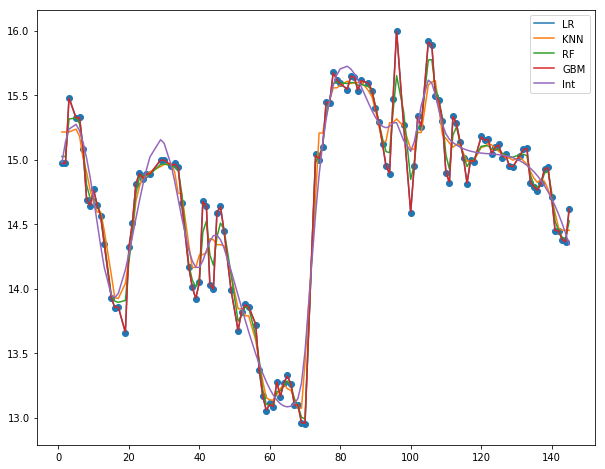

In [121]:
# Missing Stock Prices
import numpy as np
from scipy import interpolate
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
%matplotlib inline 

def readTrainData():
    inputfile = open("../Data/input08.txt", "r")
    x_train = []
    y_train = []
    x_test = []
    n = int(inputfile.readline())
    for i in range(0,n):
        line = inputfile.readline()
        tmp = list(map(str, line.split()))
        try:
            y_train.append(float(tmp[2]))
            x_train.append(i)
        except:
            x_test.append(i)
    return np.asarray(x_train).reshape(-1, 1), y_train, np.asarray(x_test).reshape(-1, 1)

def readExerciseData():
    x_train = []
    y_train = []
    x_test = []
    n = int(input())
    for i in range(0,n):
        tmp = list(map(str, input().split()))
        try:
            y_train.append(float(tmp[2]))
            x_train.append(i)
        except:
            x_test.append(i)
    return np.asarray(x_train).reshape(-1, 1), y_train, np.asarray(x_test).reshape(-1, 1)

def compareResults(y_test):
    inputfile = open("../Data/output08.txt", "r")
    d = 0
    for i in range(len(y_test)):
        expected = float(inputfile.readline())
        d = d + abs(expected - y_test[i])/expected * 100.
    d = d/len(y_test)
    print( d, 50*max(2-d,0) )

x_train, y_train, x_test = readTrainData()
#x_train, y_train, x_test = readExerciseData()
degree = 5

# KNN
model_knn = KNeighborsRegressor(n_neighbors=5)
y_KNN_train = model_knn.fit(x_train, y_train).predict(x_train)
y_KNN_test = model_knn.predict(x_test)

# SVM 
#model_SVM = make_pipeline(StandardScaler(), PolynomialFeatures(degree=degree), LinearSVR(C=1, epsilon=0, max_iter = 10000))
#y_SVM_train = model_SVM.fit(x_train, y_train).predict(x_train)
#y_SVM_test = model_SVM.predict(x_test)

# RandomForest
model_RF = RandomForestRegressor(max_depth=7, random_state=0, n_estimators=500) 
y_RF_train = model_RF.fit(x_train, y_train).predict(x_train)
y_RF_test = model_RF.predict(x_test)

# GBM
model_gbm = GradientBoostingRegressor(random_state=1, n_estimators=500)
y_gbm_train = model_gbm.fit(x_train, y_train).predict(x_train)
y_gbm_test = model_gbm.predict(x_test)

# Interpolation
model_int = interpolate.UnivariateSpline(x_train, y_train, s=5)
y_int_train = np.asarray([model_int(x) for x in x_train])
y_int_test = np.asarray([model_int(x) for x in x_test])

# Ensemble Linear Regression
model_LR = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
x_train_ensemble = np.concatenate( (y_KNN_train.reshape(-1,1), y_int_train.reshape(-1,1), \
                                    y_RF_train.reshape(-1,1), y_gbm_train.reshape(-1,1)), axis = 1) 
y_LR_train = model_LR.fit(x_train_ensemble, y_train).predict(x_train_ensemble)
#y_VR = np.mean(x_train_ensemble, axis = 1)

x_test_ensemble = np.concatenate( (y_KNN_test.reshape(-1,1), y_int_test.reshape(-1,1), \
                                    y_RF_test.reshape(-1,1), y_gbm_test.reshape(-1,1)), axis = 1) 
y_LR_test = model_LR.predict(x_test_ensemble)

#for num in y_LR_test:
#    print(num)
   
compareResults(y_KNN_test)    
compareResults(y_RF_test)
compareResults(y_gbm_test)
compareResults(y_int_test) 
compareResults(y_LR_test)

plt.figure(figsize=(10,8))
plt.scatter(x_train, y_train)
plt.plot(x_train, y_LR_train, label = 'LR')
plt.plot(x_train, y_KNN_train, label = 'KNN')
#plt.plot(x_train, y_SVM_train, label = 'SVM')
plt.plot(x_train, y_RF_train, label = 'RF')
plt.plot(x_train, y_gbm_train, label = 'GBM')
plt.plot(x_train, y_int_train, label = 'Int')
#plt.plot(x_train, y_VR, label = 'VR')
plt.legend()
plt.show()